In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive

In [20]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/face/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/face/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 66 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [22]:
model=Sequential()
#model CNN

# input
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 1
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 2
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# output
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(2,activation='Softmax'))

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]

In [23]:
history=model.fit(train,steps_per_epoch=len(train),batch_size = 64,epochs=20,validation_data=test,validation_steps=len(test),callbacks=callbacks,verbose = 1)

Epoch 1/20
3/3 [==============================] - 28s 7s/step - loss: 1.4860 - accuracy: 0.7576 - val_loss: 3.1300 - val_accuracy: 0.4118
Epoch 2/20
3/3 [==============================] - 5s 2s/step - loss: 3.1836 - accuracy: 0.5455 - val_loss: 2.5614 - val_accuracy: 0.5882
Epoch 3/20
3/3 [==============================] - 5s 3s/step - loss: 0.7650 - accuracy: 0.5455 - val_loss: 0.7367 - val_accuracy: 0.4118
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 0.6854 - accuracy: 0.4545 - val_loss: 1.1487 - val_accuracy: 0.5882
Epoch 5/20
3/3 [==============================] - 6s 3s/step - loss: 1.2864 - accuracy: 0.7576 - val_loss: 1.5858 - val_accuracy: 0.5882
Epoch 6/20
3/3 [==============================] - 12s 6s/step - loss: 0.7540 - accuracy: 0.7576 - val_loss: 0.6999 - val_accuracy: 0.5882
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.6099 - accuracy: 0.7879 - val_loss: 0.6039 - val_accuracy: 0.8235
Epoch 8/20
3/3 [=======================

In [24]:
model.save('face_CNN.h5')

In [25]:
from keras.models import load_model
models = load_model('face_CNN.h5')

In [31]:
score = model.evaluate(test,verbose=1)
print('Test loss= ', score[0])
print('Test accuracy= ', score[1])

1/1 [==============================] - 1s 912ms/step - loss: 0.2554 - accuracy: 0.9412
Test loss=  0.2554144263267517
Test accuracy=  0.9411764740943909


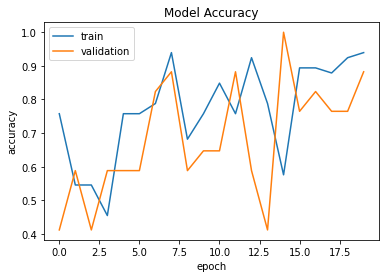

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

Trung


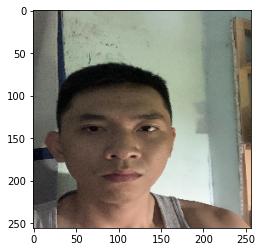

In [30]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

classes = ['Trung', 'Khong phai']

img = load_img('trung.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])